**Importamos las librerias**

In [1]:
!pip install tensorflow
!pip install wandb

import boto3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import os
import scipy
import io
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
import tensorflow.keras.optimizers as Optimizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
2023-11-17 19:22:04.380330: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-17 19:22:07.351579: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import wandb
from wandb.keras import WandbCallback
wandb.login()
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint
import random

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: josediazbaraibar (obligatorio-cladera_diaz_lemos). Use `wandb login --relogin` to force relogin


**Inicializa un cliente de S3**

In [3]:
# Inicializa un cliente de S3
s3 = boto3.client('s3')
# Nombre del bucket
bucket_name = 'mlenprod'

**Cargamos las imagenes de hombres para train y validation**

In [4]:
#Prefijo del folder

folder_prefix = 'imagenes/hombres_train/'
hombres_train = [] #creamos la lista con las imagenes hombres_train
 
# Obtén la lista de objetos en el folder
objects = s3.list_objects_v2(Bucket=bucket_name, Prefix=folder_prefix)
 
# Verifica si hay contenido en la respuesta

if 'Contents' not in objects:
    print('No objects found')
else:
    # Itera sobre cada objeto (imagen)
    for obj in objects.get('Contents', []):
        key = obj['Key']
        # Ignora el propio folder (si aparece en la lista)
        if key.endswith('/'):
            continue
        # Obtén la imagen de S3

        response = s3.get_object(Bucket=bucket_name, Key=key)
        image_data = response['Body'].read()
    
        # Convierte los datos de imagen en un objeto Image de PIL
        
        image = Image.open(io.BytesIO(image_data)).convert('RGB')
        
         # Redimensiona la imagen para que tenga el tamaño deseado# Tamaño deseado para todas las imágenes
        desired_size = (150, 150)  # Reemplaza con el tamaño deseado
            
        image = ImageOps.fit(image, desired_size, Image.HAMMING)
        hombres_train.append(image)

# Convertir las listas de imágenes en arrays de NumPy
hombres_train = np.array([np.asarray(image, dtype=np.float32)/255 for image in hombres_train])

In [5]:
#Prefijo del folder

folder_prefix = 'imagenes/hombres_validation/'
hombres_validation = [] #creamos la lista con las imagenes hombres_validation
 
# Obtén la lista de objetos en el folder
objects = s3.list_objects_v2(Bucket=bucket_name, Prefix=folder_prefix)
 
# Verifica si hay contenido en la respuesta

if 'Contents' not in objects:
    print('No objects found')
else:
    # Itera sobre cada objeto (imagen)
    for obj in objects.get('Contents', []):
        key = obj['Key']
        # Ignora el propio folder (si aparece en la lista)
        if key.endswith('/'):
            continue
        # Obtén la imagen de S3

        response = s3.get_object(Bucket=bucket_name, Key=key)
        image_data = response['Body'].read()
    
        # Convierte los datos de imagen en un objeto Image de PIL
        image = Image.open(io.BytesIO(image_data)).convert('RGB')

         # Redimensiona la imagen para que tenga el tamaño deseado# Tamaño deseado para todas las imágenes
        desired_size = (150, 150)  # Reemplaza con el tamaño deseado
            
        image = ImageOps.fit(image, desired_size, Image.LANCZOS)
        hombres_validation.append(image)

# Convertir las listas de imágenes en arrays de NumPy
hombres_validation = np.array([np.asarray(image, dtype=np.float32)/255 for image in hombres_validation])

**Cargamos las imagenes de mujeres para train y validation**

In [6]:
#Prefijo del folder

folder_prefix = 'imagenes/mujeres_train/'
mujeres_train = [] #creamos la lista con las imagenes mujeres_train
 
# Obtén la lista de objetos en el folder
objects = s3.list_objects_v2(Bucket=bucket_name, Prefix=folder_prefix)
 
# Verifica si hay contenido en la respuesta

if 'Contents' not in objects:
    print('No objects found')
else:
    # Itera sobre cada objeto (imagen)
    for obj in objects.get('Contents', []):
        key = obj['Key']
        # Ignora el propio folder (si aparece en la lista)
        if key.endswith('/'):
            continue
        # Obtén la imagen de S3

        response = s3.get_object(Bucket=bucket_name, Key=key)
        image_data = response['Body'].read()
    
        # Convierte los datos de imagen en un objeto Image de PIL
        
        image = Image.open(io.BytesIO(image_data)).convert('RGB')

         # Redimensiona la imagen para que tenga el tamaño deseado# Tamaño deseado para todas las imágenes
        desired_size = (150, 150)  # Reemplaza con el tamaño deseado
            
        image = ImageOps.fit(image, desired_size, Image.LANCZOS)
        mujeres_train.append(image)

# Convertir las listas de imágenes en arrays de NumPy
mujeres_train = np.array([np.asarray(image, dtype=np.float32)/255 for image in mujeres_train])

In [7]:
#Prefijo del folder

folder_prefix = 'imagenes/mujeres_validation/'
mujeres_validation = [] #creamos la lista con las imagenes mujeres_validation
 
# Obtén la lista de objetos en el folder
objects = s3.list_objects_v2(Bucket=bucket_name, Prefix=folder_prefix)
 
# Verifica si hay contenido en la respuesta

if 'Contents' not in objects:
    print('No objects found')
else:
    # Itera sobre cada objeto (imagen)
    for obj in objects.get('Contents', []):
        key = obj['Key']
        # Ignora el propio folder (si aparece en la lista)
        if key.endswith('/'):
            continue
        # Obtén la imagen de S3

        response = s3.get_object(Bucket=bucket_name, Key=key)
        image_data = response['Body'].read()
    
        # Convierte los datos de imagen en un objeto Image de PIL
        image = Image.open(io.BytesIO(image_data)).convert('RGB')

         # Redimensiona la imagen para que tenga el tamaño deseado# Tamaño deseado para todas las imágenes
        desired_size = (150, 150)  # Reemplaza con el tamaño deseado
            
        image = ImageOps.fit(image, desired_size, Image.LANCZOS)
        mujeres_validation.append(image)

# Convertir las listas de imágenes en arrays de NumPy
mujeres_validation = np.array([np.asarray(image, dtype=np.float32)/255 for image in mujeres_validation])

**Vemos un ejemplo de imagen de hombre y mujer**

(150, 150, 3)


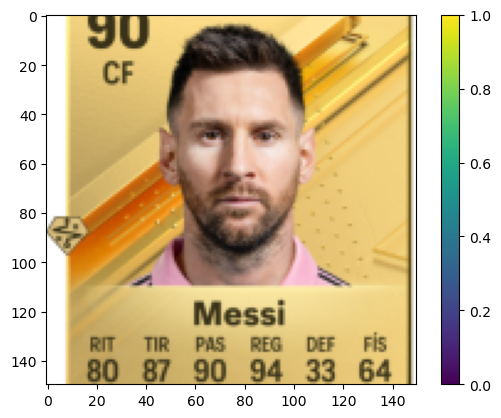

In [8]:
print(hombres_train[1].shape)
plt.figure()
plt.imshow(np.squeeze(hombres_train[4]))
plt.colorbar()
plt.grid(False)
plt.show()


(150, 150, 3)


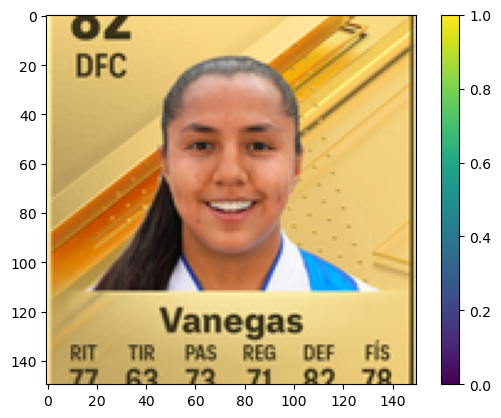

In [9]:
print(mujeres_train[1].shape)
plt.figure()
plt.imshow(np.squeeze(mujeres_train[360]))
plt.colorbar()
plt.grid(False)
plt.show()

**Unimos las imagenes de hombres y mujeres para train y validation**

In [10]:
#IMAGENES TRAIN
imagenes_train = np.concatenate([hombres_train,mujeres_train])
print(len(imagenes_train)) #imprimimos la longitud del arreglo que nos muestra la cantidad de imagenes
Imagenes_train = np.array(imagenes_train)
print(Imagenes_train.shape)

#IMAGENES VALIDATION
imagenes_validation = np.concatenate([hombres_validation,mujeres_validation])
print(len(imagenes_validation)) #imprimimos la longitud del arreglo que nos muestra la cantidad de imagenes
Imagenes_validation = np.array(imagenes_validation)
print(Imagenes_validation.shape)

741
(741, 150, 150, 3)
148
(148, 150, 150, 3)


**Cargamos las etiquetas de hombres para train y validation**

In [11]:
etiquetas_hombres_train = np.repeat(0,380)
print(len(etiquetas_hombres_train))
print(etiquetas_hombres_train)

etiquetas_hombres_validation = np.repeat(0,84)
print(len(etiquetas_hombres_validation))
print(etiquetas_hombres_validation)


380
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
84
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]


**Cargamos las etiquetas de mujeres para train y validation**

In [12]:
etiquetas_mujeres_train = np.repeat(1,361)
print(len(etiquetas_mujeres_train))
print(etiquetas_mujeres_train)

etiquetas_mujeres_validation = np.repeat(1,64)

print(len(etiquetas_mujeres_validation))
print(etiquetas_mujeres_validation)


361
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
64
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [13]:
class_names = ['HOMBRE','MUJER']
print(class_names)

['HOMBRE', 'MUJER']


**Unimos las etiquetas de hombres y mujeres para train y validation**

In [14]:
#ETIQUETAS ENTRENAMIENTO
labels_train = np.concatenate([etiquetas_hombres_train,etiquetas_mujeres_train])
print(len(labels_train))
print(labels_train)
Labels_train = np.array(labels_train)
print(Labels_train.shape)

#ETIQUETAS VALIDATION
labels_validation = np.concatenate([etiquetas_hombres_validation,etiquetas_mujeres_validation])
print(len(labels_validation))
print(labels_validation)
Labels_validation = np.array(labels_validation)
print(Labels_validation.shape)


741
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 

**Ploteamos varias imagenes del dataset final de train**

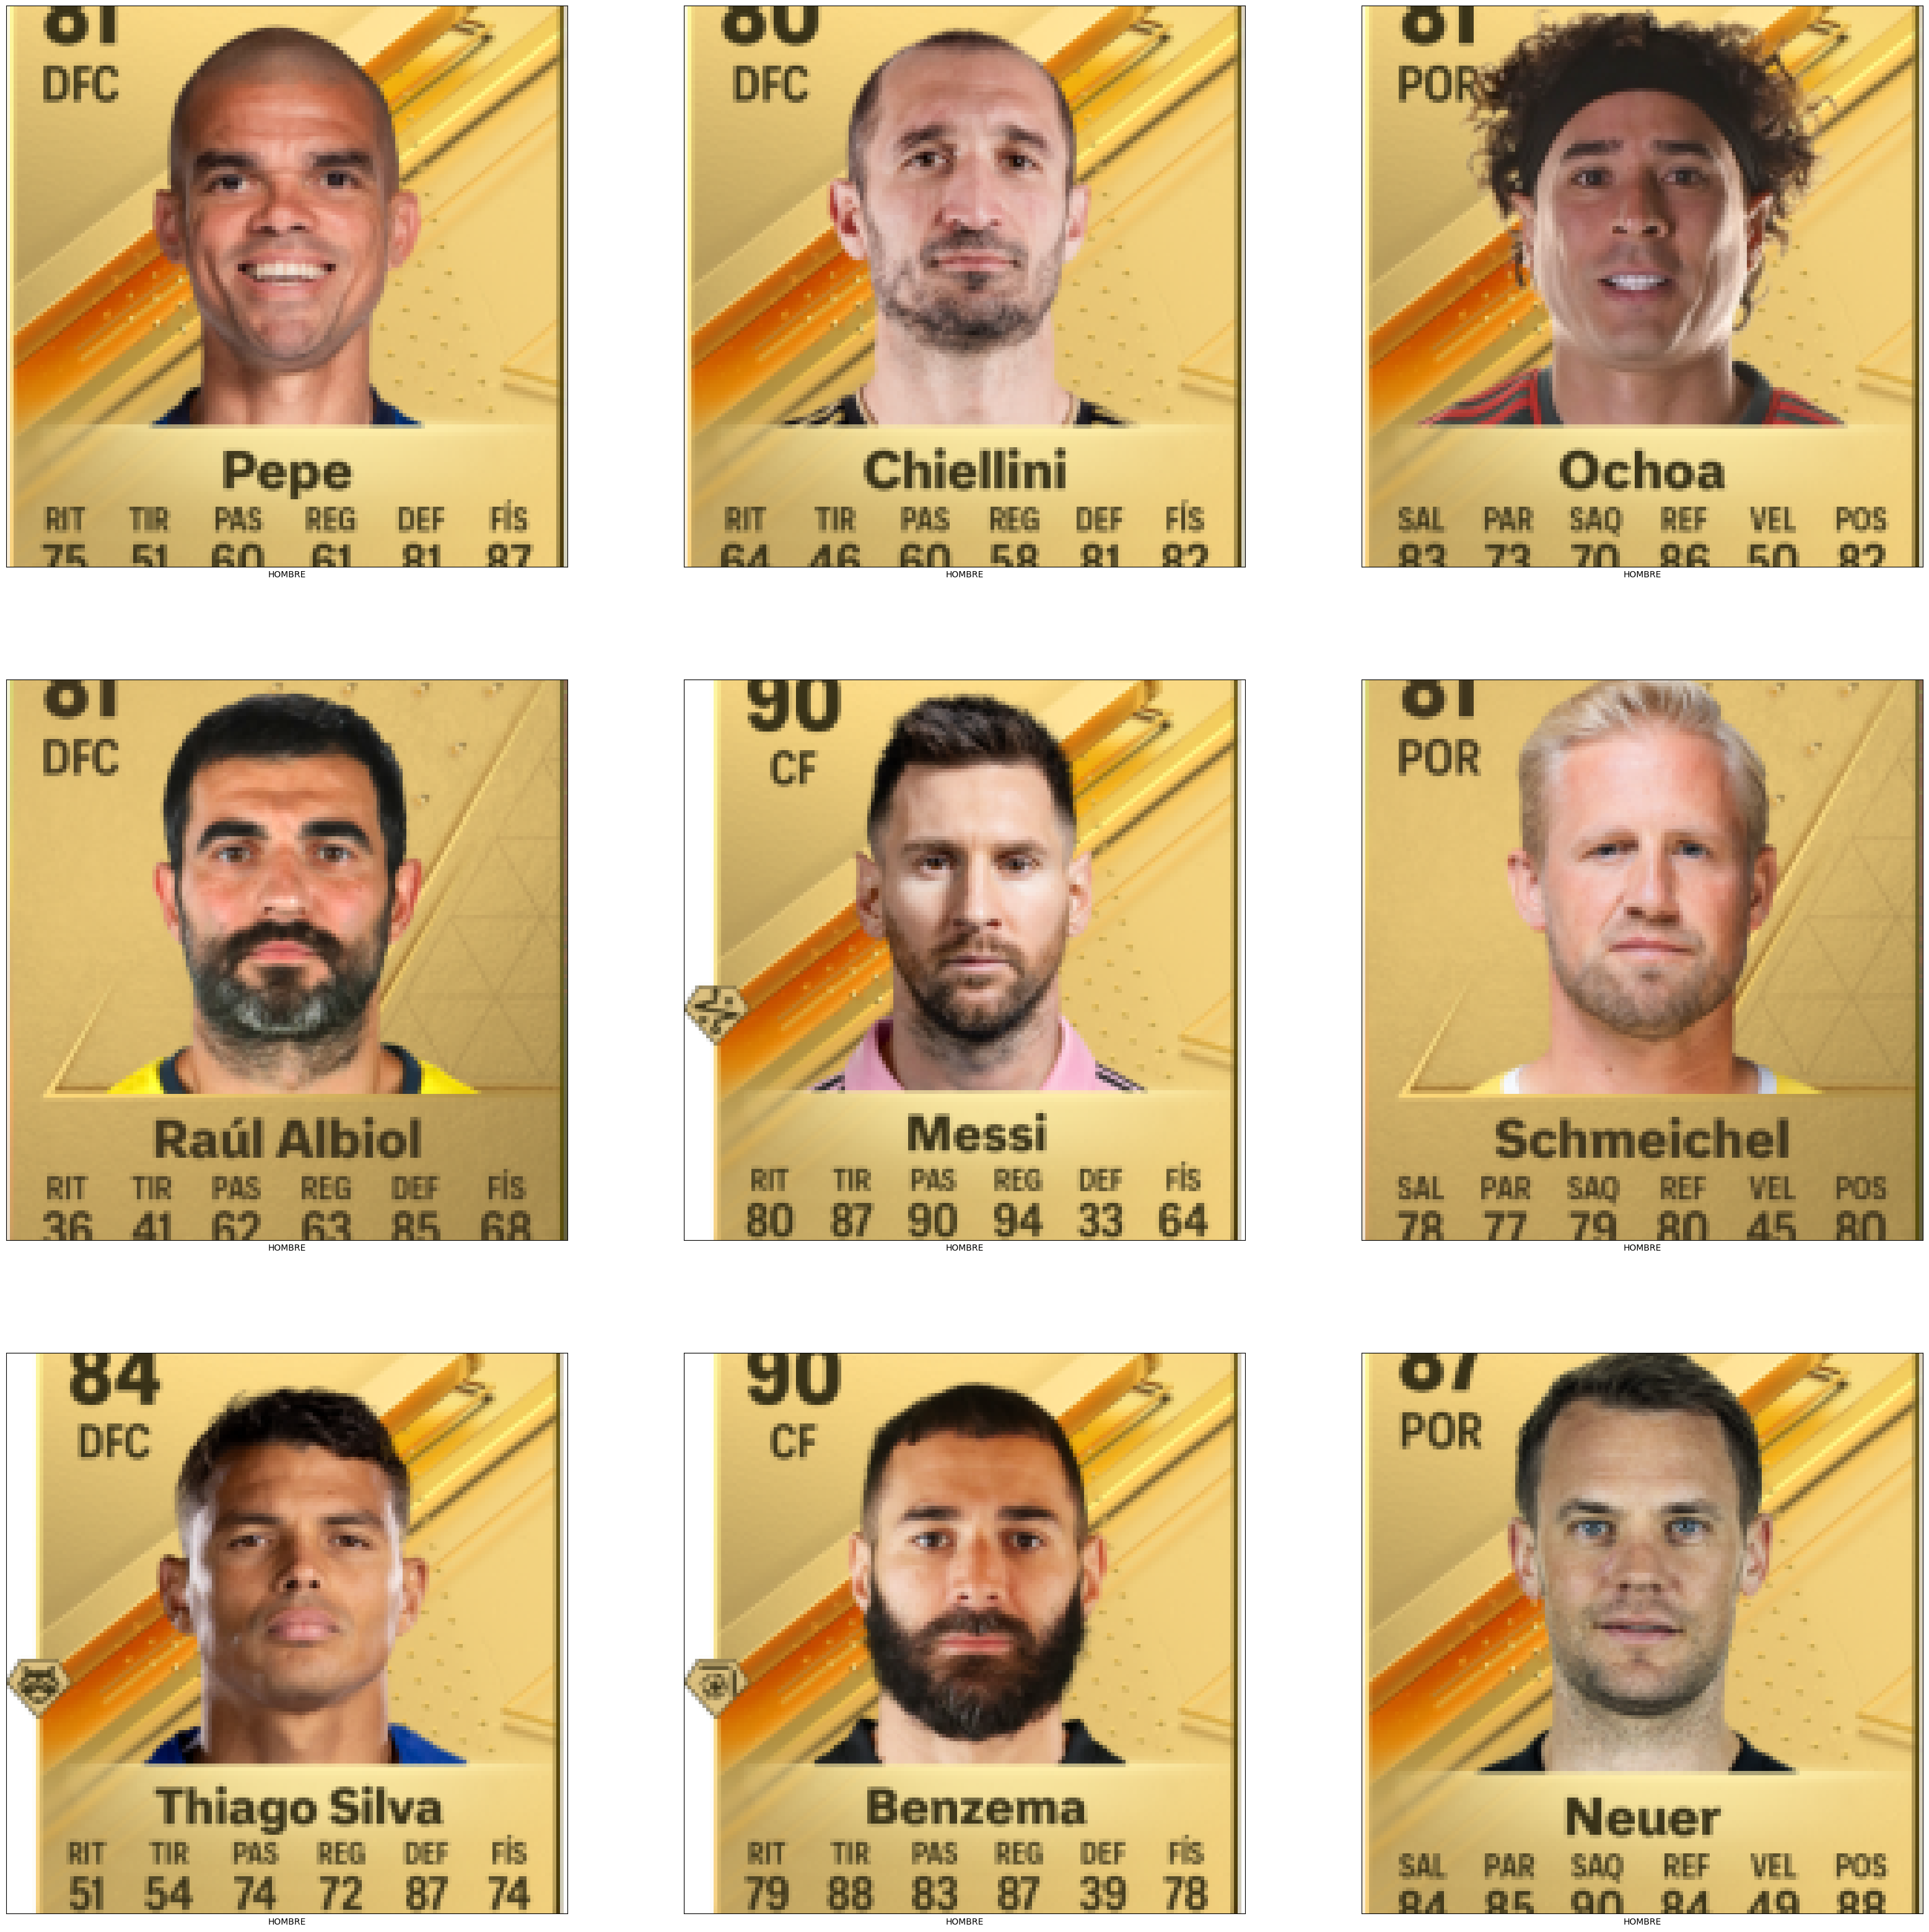

In [15]:
plt.figure(figsize=(40,40))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Imagenes_train[i])
    #, cmap=plt.cm.binary
    plt.xlabel(class_names[Labels_train[i]])
plt.show()

**Transform Pattern**

**Modelo**

In [16]:
#SE DEFINE EL MODELO
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(150, 150, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')])


2023-11-17 19:23:54.816580: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [17]:
sweep_config = {
    'method': 'grid',  # el método de búsqueda de hiperparámetros
    'metric': {
      'name': 'accuracy',
      'goal': 'maximize'  
    },
    'parameters': {
        'batch_size': {
            'values': [64, 128]
        },
    }
}
#config.bath_size

sweep_id = wandb.sweep(sweep_config, project="Htuning")

def train():
    run = wandb.init()
    config = run.config

    modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = modelo.fit(Imagenes_train, Labels_train, batch_size=config.batch_size, epochs=10, validation_data=(Imagenes_validation, Labels_validation), callbacks=[WandbCallback()])

wandb.agent(sweep_id, function=train)

Create sweep with ID: 6zh2jtkl
Sweep URL: https://wandb.ai/obligatorio-cladera_diaz_lemos/Htuning/sweeps/6zh2jtkl


wandb: Agent Starting Run: yxf52puk with config:
wandb: 	batch_size: 64
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.
2023-11-17 19:24:12.881049: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 200070000 exceeds 10% of free system memory.


Epoch 1/10
12/12 [==============================] - ETA: 0s - loss: 28.0386 - accuracy: 0.4899

INFO:tensorflow:Assets written to: /home/ec2-user/SageMaker/wandb/run-20231117_192356-yxf52puk/files/model-best/assets


INFO:tensorflow:Assets written to: /home/ec2-user/SageMaker/wandb/run-20231117_192356-yxf52puk/files/model-best/assets
wandb: Adding directory to artifact (/home/ec2-user/SageMaker/wandb/run-20231117_192356-yxf52puk/files/model-best)... Done. 2.0s


12/12 [==============================] - 7s 569ms/step - loss: 28.0386 - accuracy: 0.4899 - val_loss: 7.5832 - val_accuracy: 0.4324
Epoch 2/10
12/12 [==============================] - ETA: 0s - loss: 3.6177 - accuracy: 0.5789

INFO:tensorflow:Assets written to: /home/ec2-user/SageMaker/wandb/run-20231117_192356-yxf52puk/files/model-best/assets


INFO:tensorflow:Assets written to: /home/ec2-user/SageMaker/wandb/run-20231117_192356-yxf52puk/files/model-best/assets
wandb: Adding directory to artifact (/home/ec2-user/SageMaker/wandb/run-20231117_192356-yxf52puk/files/model-best)... Done. 1.7s


12/12 [==============================] - 7s 621ms/step - loss: 3.6177 - accuracy: 0.5789 - val_loss: 1.4010 - val_accuracy: 0.5811
Epoch 3/10
12/12 [==============================] - ETA: 0s - loss: 1.1827 - accuracy: 0.6788

INFO:tensorflow:Assets written to: /home/ec2-user/SageMaker/wandb/run-20231117_192356-yxf52puk/files/model-best/assets


INFO:tensorflow:Assets written to: /home/ec2-user/SageMaker/wandb/run-20231117_192356-yxf52puk/files/model-best/assets
wandb: Adding directory to artifact (/home/ec2-user/SageMaker/wandb/run-20231117_192356-yxf52puk/files/model-best)... Done. 1.8s


12/12 [==============================] - 7s 592ms/step - loss: 1.1827 - accuracy: 0.6788 - val_loss: 0.1020 - val_accuracy: 0.9730
Epoch 4/10
12/12 [==============================] - 2s 189ms/step - loss: 0.2586 - accuracy: 0.9150 - val_loss: 0.1239 - val_accuracy: 0.9527
Epoch 5/10
12/12 [==============================] - ETA: 0s - loss: 0.0990 - accuracy: 0.9636

INFO:tensorflow:Assets written to: /home/ec2-user/SageMaker/wandb/run-20231117_192356-yxf52puk/files/model-best/assets


INFO:tensorflow:Assets written to: /home/ec2-user/SageMaker/wandb/run-20231117_192356-yxf52puk/files/model-best/assets
wandb: Adding directory to artifact (/home/ec2-user/SageMaker/wandb/run-20231117_192356-yxf52puk/files/model-best)... Done. 1.7s


12/12 [==============================] - 5s 459ms/step - loss: 0.0990 - accuracy: 0.9636 - val_loss: 0.0901 - val_accuracy: 0.9730
Epoch 6/10
12/12 [==============================] - ETA: 0s - loss: 0.0786 - accuracy: 0.9730

INFO:tensorflow:Assets written to: /home/ec2-user/SageMaker/wandb/run-20231117_192356-yxf52puk/files/model-best/assets


INFO:tensorflow:Assets written to: /home/ec2-user/SageMaker/wandb/run-20231117_192356-yxf52puk/files/model-best/assets
wandb: Adding directory to artifact (/home/ec2-user/SageMaker/wandb/run-20231117_192356-yxf52puk/files/model-best)... Done. 1.8s


12/12 [==============================] - 6s 566ms/step - loss: 0.0786 - accuracy: 0.9730 - val_loss: 0.0874 - val_accuracy: 0.9595
Epoch 7/10
12/12 [==============================] - ETA: 0s - loss: 0.0760 - accuracy: 0.9676

INFO:tensorflow:Assets written to: /home/ec2-user/SageMaker/wandb/run-20231117_192356-yxf52puk/files/model-best/assets


INFO:tensorflow:Assets written to: /home/ec2-user/SageMaker/wandb/run-20231117_192356-yxf52puk/files/model-best/assets
wandb: Adding directory to artifact (/home/ec2-user/SageMaker/wandb/run-20231117_192356-yxf52puk/files/model-best)... Done. 1.7s


12/12 [==============================] - 7s 625ms/step - loss: 0.0760 - accuracy: 0.9676 - val_loss: 0.0857 - val_accuracy: 0.9730
Epoch 8/10
12/12 [==============================] - 2s 189ms/step - loss: 0.0719 - accuracy: 0.9717 - val_loss: 0.0993 - val_accuracy: 0.9730
Epoch 9/10
12/12 [==============================] - 2s 168ms/step - loss: 0.0878 - accuracy: 0.9622 - val_loss: 0.1012 - val_accuracy: 0.9730
Epoch 10/10
12/12 [==============================] - 2s 181ms/step - loss: 0.0778 - accuracy: 0.9703 - val_loss: 0.0986 - val_accuracy: 0.9797


accuracy,▁▂▄▇██████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▂▁▁▁▁▁▁▁▁
val_accuracy,▁▃████████
val_loss,█▂▁▁▁▁▁▁▁▁
accuracy,0.97031
best_epoch,6
best_val_loss,0.08565
epoch,9
loss,0.07778
val_accuracy,0.97973


wandb: Agent Starting Run: ru2u9wdx with config:
wandb: 	batch_size: 128
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10


2023-11-17 19:25:31.160759: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 200070000 exceeds 10% of free system memory.


6/6 [==============================] - ETA: 0s - loss: 3.1384 - accuracy: 0.6086

INFO:tensorflow:Assets written to: /home/ec2-user/SageMaker/wandb/run-20231117_192515-ru2u9wdx/files/model-best/assets


INFO:tensorflow:Assets written to: /home/ec2-user/SageMaker/wandb/run-20231117_192515-ru2u9wdx/files/model-best/assets
wandb: Adding directory to artifact (/home/ec2-user/SageMaker/wandb/run-20231117_192515-ru2u9wdx/files/model-best)... Done. 3.3s


6/6 [==============================] - 7s 1s/step - loss: 3.1384 - accuracy: 0.6086 - val_loss: 0.9320 - val_accuracy: 0.6757
Epoch 2/10
6/6 [==============================] - ETA: 0s - loss: 0.8167 - accuracy: 0.6842

INFO:tensorflow:Assets written to: /home/ec2-user/SageMaker/wandb/run-20231117_192515-ru2u9wdx/files/model-best/assets


INFO:tensorflow:Assets written to: /home/ec2-user/SageMaker/wandb/run-20231117_192515-ru2u9wdx/files/model-best/assets
wandb: Adding directory to artifact (/home/ec2-user/SageMaker/wandb/run-20231117_192515-ru2u9wdx/files/model-best)... Done. 3.0s


6/6 [==============================] - 7s 1s/step - loss: 0.8167 - accuracy: 0.6842 - val_loss: 0.1291 - val_accuracy: 0.9527
Epoch 3/10
6/6 [==============================] - 1s 231ms/step - loss: 0.3573 - accuracy: 0.8381 - val_loss: 0.2467 - val_accuracy: 0.8851
Epoch 4/10
6/6 [==============================] - ETA: 0s - loss: 0.2049 - accuracy: 0.9150

INFO:tensorflow:Assets written to: /home/ec2-user/SageMaker/wandb/run-20231117_192515-ru2u9wdx/files/model-best/assets


INFO:tensorflow:Assets written to: /home/ec2-user/SageMaker/wandb/run-20231117_192515-ru2u9wdx/files/model-best/assets
wandb: Adding directory to artifact (/home/ec2-user/SageMaker/wandb/run-20231117_192515-ru2u9wdx/files/model-best)... Done. 2.3s


6/6 [==============================] - 7s 1s/step - loss: 0.2049 - accuracy: 0.9150 - val_loss: 0.1078 - val_accuracy: 0.9730
Epoch 5/10
6/6 [==============================] - 1s 198ms/step - loss: 0.1417 - accuracy: 0.9447 - val_loss: 0.1134 - val_accuracy: 0.9527
Epoch 6/10
6/6 [==============================] - ETA: 0s - loss: 0.1111 - accuracy: 0.9582

INFO:tensorflow:Assets written to: /home/ec2-user/SageMaker/wandb/run-20231117_192515-ru2u9wdx/files/model-best/assets


INFO:tensorflow:Assets written to: /home/ec2-user/SageMaker/wandb/run-20231117_192515-ru2u9wdx/files/model-best/assets
wandb: Adding directory to artifact (/home/ec2-user/SageMaker/wandb/run-20231117_192515-ru2u9wdx/files/model-best)... Done. 4.8s


6/6 [==============================] - 8s 2s/step - loss: 0.1111 - accuracy: 0.9582 - val_loss: 0.0789 - val_accuracy: 0.9730
Epoch 7/10
6/6 [==============================] - 2s 357ms/step - loss: 0.0938 - accuracy: 0.9622 - val_loss: 0.0796 - val_accuracy: 0.9662
Epoch 8/10
6/6 [==============================] - 1s 241ms/step - loss: 0.0801 - accuracy: 0.9703 - val_loss: 0.0909 - val_accuracy: 0.9595
Epoch 9/10
6/6 [==============================] - ETA: 0s - loss: 0.0777 - accuracy: 0.9757

INFO:tensorflow:Assets written to: /home/ec2-user/SageMaker/wandb/run-20231117_192515-ru2u9wdx/files/model-best/assets


INFO:tensorflow:Assets written to: /home/ec2-user/SageMaker/wandb/run-20231117_192515-ru2u9wdx/files/model-best/assets
wandb: Adding directory to artifact (/home/ec2-user/SageMaker/wandb/run-20231117_192515-ru2u9wdx/files/model-best)... Done. 2.2s


6/6 [==============================] - 5s 1s/step - loss: 0.0777 - accuracy: 0.9757 - val_loss: 0.0768 - val_accuracy: 0.9730
Epoch 10/10
6/6 [==============================] - 1s 252ms/step - loss: 0.0674 - accuracy: 0.9744 - val_loss: 0.0836 - val_accuracy: 0.9662


accuracy,▁▂▅▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▁▁▁▁▁▁▁
val_accuracy,▁█▆███████
val_loss,█▁▂▁▁▁▁▁▁▁
accuracy,0.97436
best_epoch,8
best_val_loss,0.07679
epoch,9
loss,0.06741
val_accuracy,0.96622


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


In [18]:
modelo.save('model.h5')

**Guardamos el artefacto en S3**

In [19]:
# Nombre del archivo local y del bucket de S3
local_file_name = 'model.h5'
s3_bucket_name = 'mlenprod'

# Ruta en S3 donde deseas almacenar el archivo
s3_key = 'artifacts/model.h5'

# Crea una instancia del cliente S3
s3_client = boto3.client('s3')

# Sube el archivo a S3
s3_client.upload_file(local_file_name, s3_bucket_name, s3_key)

print(f'Archivo {local_file_name} subido exitosamente a {s3_key} en el bucket {s3_bucket_name}.')

Archivo model.h5 subido exitosamente a artifacts/model.h5 en el bucket mlenprod.


**Predictor casero**

In [20]:
img = Imagenes_validation[10]
print(img.shape)
img = (np.expand_dims(img,0))
print(img.shape)

(150, 150, 3)
(1, 150, 150, 3)


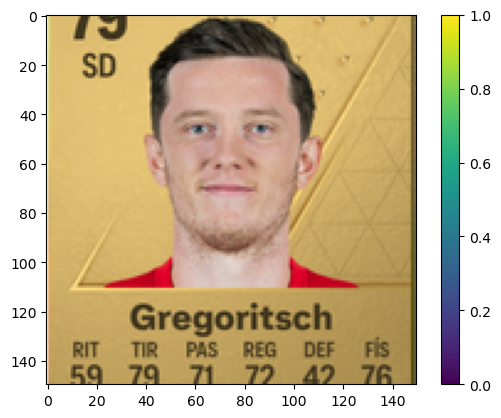

In [21]:
plt.figure()
plt.imshow(Imagenes_validation[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [22]:
predictions_single = modelo.predict(img)
print(predictions_single)
print(np.sum(predictions_single))
print(np.argmax(predictions_single))
print(class_names[np.argmax(predictions_single)])

1/1 [==============================] - 0s 178ms/step
[[0.98836577 0.01163422]]
1.0
0
HOMBRE
